In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns
from scipy.stats import chisquare,chi2_contingency,chi2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
datos_originales = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="base datos")

In [4]:
print(datos_originales.columns)

Index(['Orden', 'Sección', 'Edad', 'Sexo', 'Muni Res', 'Depto Res',
       'Título Div', 'Título Lic.', 'Trabajó', 'Salario', 'Estado conyugal',
       'Medio de información', 'Soborno', 'copy paste'],
      dtype='object')


In [5]:
def describe(df,stats):
    statistics = df.describe()
    statistics = statistics.append(df.reindex_axis(statistics.columns,1).agg(stats))
    
    return statistics

# Preparación de los datos
* Unir con catalogos 
* Eliminar valores atípicos 

In [6]:
#Catalogos
df_seccion = pd.DataFrame(data = {'Sección':[1,2],'seccion':['A','B']})
df_sexo = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 1,nrows =2,usecols = 'B:C', names =['Sexo','sexo'])
df_titulo_diversificado = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 4,nrows =15,usecols = 'D:E', names =['Título Div','titulo_diversificado'])
df_titulo_licenciatura = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 20,nrows =9,usecols = 'D:E', names =['Título Lic.','titulo_licenciatura'])
df_trabaja = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 30,nrows =2,usecols = 'D:E', names =['Trabajó','trabaja'])
df_estado_conyugal = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 36,nrows =6,usecols = 'C:D', names =['Estado conyugal','estado_conyugal'])
df_medio_informacion = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 43,nrows =7,usecols = 'F:G', names =['Medio de información','medio_informacion'])
df_soborno = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 51,nrows =3,usecols = 'F:G', names =['Soborno','soborno'])
df_copy_paste = pd.read_excel("baase de datos encuestas.xlsx",sheet_name="Hoja2",skiprows = 55,nrows =3,usecols = 'G:H', names =['copy paste','copy_paste'])

In [7]:
datos_analisis = datos_originales.merge(df_sexo,on='Sexo') \
        .merge(df_seccion,on='Sección') \
        .merge(df_titulo_diversificado,on = 'Título Div') \
        .merge(df_titulo_licenciatura, on ='Título Lic.') \
        .merge(df_trabaja,on = 'Trabajó') \
        .merge(df_estado_conyugal,on = 'Estado conyugal') \
        .merge(df_medio_informacion, on = 'Medio de información') \
        .merge(df_soborno,on='Soborno') \
        .merge(df_copy_paste, on ='copy paste') \
        .drop(['Orden','Sección','Sexo','Título Div','Título Lic.','Trabajó','Estado conyugal','Medio de información','Soborno','copy paste'],axis=1)
datos_analisis = datos_analisis.replace(99999, None)



In [8]:
seccionA = datos_analisis[datos_analisis['seccion']=='A']
seccionB = datos_analisis[datos_analisis['seccion']=='B']
Hombres = datos_analisis[datos_analisis['sexo']=='Hombre']
Mujeres = datos_analisis[datos_analisis['sexo']=='Mujer']

# filtrar solo: trabaja = si

seccionA_si_trabaja = seccionA[seccionA["trabaja"] == "Sí"]
seccionB_si_trabaja = seccionB[seccionB["trabaja"] == "Sí"]
Hombres_si_trabaja = Hombres[Hombres["trabaja"] == "Sí"]
Mujeres_si_trabaja = Mujeres[Mujeres["trabaja"] == "Sí"]

# Visualizar (vista previa) de los datos

## Datos Generales


In [9]:
datos_analisis

,Edad,Muni Res,Depto Res,Salario,sexo,seccion,titulo_diversificado,titulo_licenciatura,trabaja,estado_conyugal,medio_informacion,soborno,copy_paste
0,26,Chinautla,Guatemala,2500,Hombre,B,Perito Contador,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
1,24,Guatemala,Guatemala,7000,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
2,29,Mixco,Guatemala,16000,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
3,25,Villa Nueva,Guatemala,2200,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
4,25,Guatemala,Guatemala,2000,Hombre,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
5,25,San Miguel Petapa,Guatemala,5000,Hombre,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
6,25,Mixco,Guatemala,4000,Mujer,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
7,30,Guatemala,Guatemala,7520,Mujer,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
8,29,Guatemala,Guatemala,2500,Hombre,B,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
9,32,Mixco,Guatemala,1425,Mujer,B,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca


## Datos seccion A

In [10]:
seccionA

,Edad,Muni Res,Depto Res,Salario,sexo,seccion,titulo_diversificado,titulo_licenciatura,trabaja,estado_conyugal,medio_informacion,soborno,copy_paste
4,25,Guatemala,Guatemala,2000,Hombre,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
5,25,San Miguel Petapa,Guatemala,5000,Hombre,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
6,25,Mixco,Guatemala,4000,Mujer,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
7,30,Guatemala,Guatemala,7520,Mujer,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
10,25,Guatemala,Guatemala,4500,Hombre,A,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
13,30,Guatemala,Guatemala,20000,Mujer,A,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
14,29,Chinautla,Guatemala,8000,Mujer,A,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
16,25,Chimaltenango,Chimaltenango,9000,Hombre,A,Bachiller en Ciencias y Letras con orientación...,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
17,26,Amatitlan,Guatemala,6300,Hombre,A,Bachiller Comercial,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
18,28,Guatemala,Guatemala,13000,Hombre,A,Bachiller en Computación,Ingenieria en Sistemas,Sí,Soltero (a),Internet,Nunca,Nunca


## Datos seccion B


In [11]:
seccionB

,Edad,Muni Res,Depto Res,Salario,sexo,seccion,titulo_diversificado,titulo_licenciatura,trabaja,estado_conyugal,medio_informacion,soborno,copy_paste
0,26,Chinautla,Guatemala,2500,Hombre,B,Perito Contador,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
1,24,Guatemala,Guatemala,7000,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
2,29,Mixco,Guatemala,16000,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
3,25,Villa Nueva,Guatemala,2200,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
8,29,Guatemala,Guatemala,2500,Hombre,B,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
9,32,Mixco,Guatemala,1425,Mujer,B,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
11,25,Guatemala,Guatemala,3000,Mujer,B,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
12,29,Magdalena Milpas Altas,Sacatepéquez,5500,Mujer,B,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
15,26,Guatemala,Guatemala,6000,Hombre,B,Perito Agrónomo,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
19,24,Mixco,Guatemala,0,Hombre,B,Bachiller en Ciencias y Letras,Medicina,No,Soltero (a),Internet,Nunca,Nunca


## Datos Hombres

In [12]:
Hombres

,Edad,Muni Res,Depto Res,Salario,sexo,seccion,titulo_diversificado,titulo_licenciatura,trabaja,estado_conyugal,medio_informacion,soborno,copy_paste
0,26,Chinautla,Guatemala,2500,Hombre,B,Perito Contador,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
1,24,Guatemala,Guatemala,7000,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
2,29,Mixco,Guatemala,16000,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
3,25,Villa Nueva,Guatemala,2200,Hombre,B,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
4,25,Guatemala,Guatemala,2000,Hombre,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
5,25,San Miguel Petapa,Guatemala,5000,Hombre,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
8,29,Guatemala,Guatemala,2500,Hombre,B,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
10,25,Guatemala,Guatemala,4500,Hombre,A,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
15,26,Guatemala,Guatemala,6000,Hombre,B,Perito Agrónomo,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
16,25,Chimaltenango,Chimaltenango,9000,Hombre,A,Bachiller en Ciencias y Letras con orientación...,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca


## Datos Mujeres

In [13]:
Mujeres

,Edad,Muni Res,Depto Res,Salario,sexo,seccion,titulo_diversificado,titulo_licenciatura,trabaja,estado_conyugal,medio_informacion,soborno,copy_paste
6,25,Mixco,Guatemala,4000,Mujer,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
7,30,Guatemala,Guatemala,7520,Mujer,A,Bachiller en Ciencias y Letras,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
9,32,Mixco,Guatemala,1425,Mujer,B,Bachiller en Computación,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
11,25,Guatemala,Guatemala,3000,Mujer,B,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
12,29,Magdalena Milpas Altas,Sacatepéquez,5500,Mujer,B,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
13,30,Guatemala,Guatemala,20000,Mujer,A,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
14,29,Chinautla,Guatemala,8000,Mujer,A,Maestro de Educación Primaria Urbana,Medicina,Sí,Soltero (a),Internet,Nunca,Nunca
21,26,Guatemala,Guatemala,0,Mujer,B,Bachiller en Ciencias y Letras,Medicina,No,Soltero (a),Internet,Nunca,Nunca
22,25,Guatemala,Guatemala,0,Mujer,B,Bachiller en Ciencias y Letras,Medicina,No,Soltero (a),Internet,Nunca,Nunca
23,24,Guatemala,Guatemala,0,Mujer,B,Bachiller en Ciencias y Letras,Medicina,No,Soltero (a),Internet,Nunca,Nunca


# Analisis Comparativos
Incluye:
* Medidas de tendencia central
* Medidas de dispersión
* Distribución de edad
* Distribución de salario

## Análisis por Sección General

In [14]:
datos_analisis.groupby(["seccion"]).describe().T

seccion                   A             B
Edad    count     58.000000     41.000000
        mean      26.068966     26.756098
        std        3.924114      3.284665
        min       22.000000     23.000000
        25%       24.000000     24.000000
        50%       25.000000     26.000000
        75%       27.000000     28.000000
        max       48.000000     36.000000
Salario count     58.000000     41.000000
        mean    5148.620690   4633.536585
        std     6355.546396   4836.907618
        min        0.000000      0.000000
        25%        0.000000      0.000000
        50%     3500.000000   3000.000000
        75%     7390.000000   8000.000000
        max    25000.000000  16000.000000

### Filtrando personas que respondieron "si" trababaja del análisis por sección general
* Esto eliminara salarios de 0 que afectan a las medidas

In [15]:
datos_analisis_si_trabajo = datos_analisis[datos_analisis["trabaja"] =="Sí"]

datos_analisis_si_trabajo.groupby(["seccion"]).describe().T

seccion                   A             B
Edad    count     33.000000     28.000000
        mean      27.515152     27.642857
        std        4.617367      3.487696
        min       23.000000     23.000000
        25%       24.000000     25.000000
        50%       26.000000     26.000000
        75%       30.000000     29.000000
        max       48.000000     36.000000
Salario count     33.000000     28.000000
        mean    9012.727273   6784.821429
        std     6015.280164   4418.549595
        min     1500.000000      0.000000
        25%     5000.000000   3000.000000
        50%     7000.000000   5750.000000
        75%    12000.000000  10000.000000
        max    25000.000000  16000.000000

## Análisis por sección y sexo

In [16]:
datos_analisis.groupby(['seccion','sexo']).describe().T
# 50% = mediana

seccion                   A                           B              
sexo                 Hombre         Mujer        Hombre         Mujer
Edad    count     32.000000     26.000000     18.000000     23.000000
        mean      26.562500     25.461538     27.388889     26.260870
        std        4.676210      2.701566      3.743840      2.863840
        min       23.000000     22.000000     23.000000     23.000000
        25%       24.000000     23.250000     25.000000     24.000000
        50%       25.000000     24.500000     26.000000     26.000000
        75%       27.250000     26.750000     29.000000     28.000000
        max       48.000000     31.000000     36.000000     34.000000
Salario count     32.000000     26.000000     18.000000     23.000000
        mean    6100.000000   3977.692308   5622.222222   3859.782609
        std     7347.986338   4749.768253   5362.566940   4346.319885
        min        0.000000      0.000000      0.000000      0.000000
        25%        0.000000      0.000000    550.000000      0.000000
        50%     3250.000000   3500.000000   4250.000000   3000.000000
        75%    11175.000000   7000.000000   9500.000000   5750.000000
        max    25000.000000  20000.000000  16000.000000  15000.000000

## Filtrando personas que respondieron "si" trababaja del análisis por sección y sexo
* Esto eliminara salarios de 0 que afectan a las medidas

In [17]:
datos_analisis_si_trabajo = datos_analisis[datos_analisis["trabaja"] =="Sí"]

datos_analisis_si_trabajo.groupby(["seccion","sexo"]).describe().T

seccion                   A                           B              
sexo                 Hombre         Mujer        Hombre         Mujer
Edad    count     19.000000     14.000000     14.000000     14.000000
        mean      28.000000     26.857143     28.142857     27.142857
        std        5.597619      2.878492      3.799942      3.207135
        min       23.000000     23.000000     24.000000     23.000000
        25%       25.000000     24.000000     25.000000     25.000000
        50%       26.000000     26.500000     27.000000     26.000000
        75%       30.000000     29.750000     29.000000     28.750000
        max       48.000000     31.000000     36.000000     34.000000
Salario count     19.000000     14.000000     14.000000     14.000000
        mean   10273.684211   7301.428571   7228.571429   6341.071429
        std     6908.436236   4184.112547   5010.055822   3876.105390
        min     1500.000000   3000.000000      0.000000   1425.000000
        25%     5250.000000   4625.000000   2625.000000   3250.000000
        50%     9000.000000   7000.000000   6500.000000   5450.000000
        75%    14000.000000   7880.000000  11500.000000   9487.500000
        max    25000.000000  20000.000000  16000.000000  15000.000000

## Distribución de edad por sección

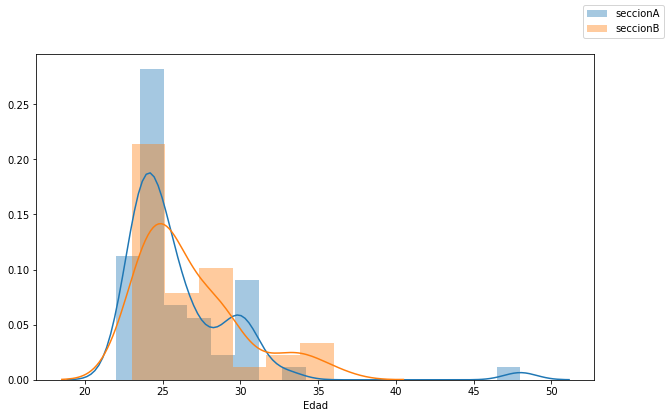

In [18]:
fig = plt.figure(figsize=(10,6))
sns.distplot(seccionA.Edad,label="seccionA")
sns.distplot(seccionB.Edad,label="seccionB")
fig.legend()
plt.show()

## Distribución de edad por sexo

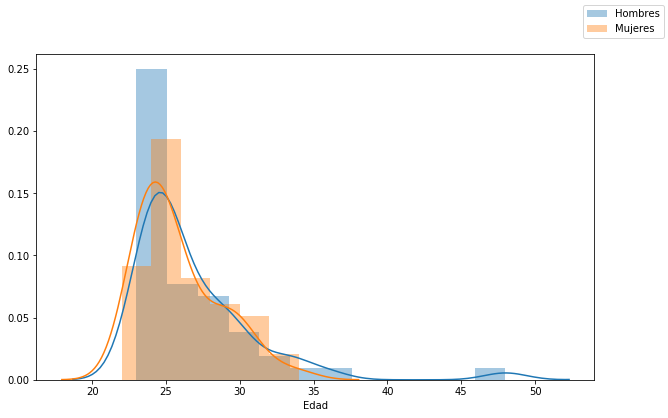

In [19]:
fig = plt.figure(figsize=(10,6))
sns.distplot(Hombres.Edad,label="Hombres")
sns.distplot(Mujeres.Edad,label="Mujeres")
fig.legend()
plt.show()

## Distribución de salario por sección(todos = trabaja y no trabaja)

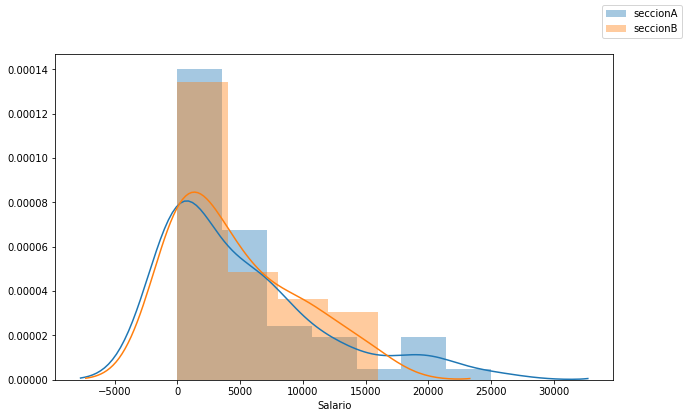

In [20]:
fig = plt.figure(figsize=(10,6))
sns.distplot(seccionA.Salario,label="seccionA")
sns.distplot(seccionB.Salario,label="seccionB")
fig.legend()#labels=['seccionA','seccionB'])

plt.show()

## Distribución de salario por sección(solo trabaja = si)

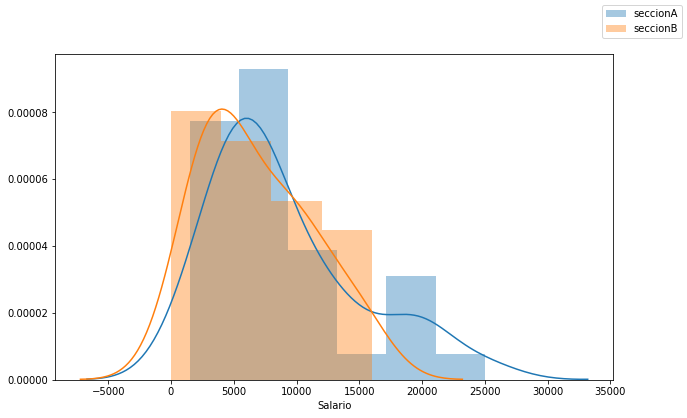

In [21]:

fig = plt.figure(figsize=(10,6))
sns.distplot(seccionA_si_trabaja.Salario,label="seccionA")
sns.distplot(seccionB_si_trabaja.Salario,label="seccionB")
fig.legend()#labels=['seccionA','seccionB'])

plt.show()

## Distribución de salario por sexo(todos = trabaja y no trabaja)

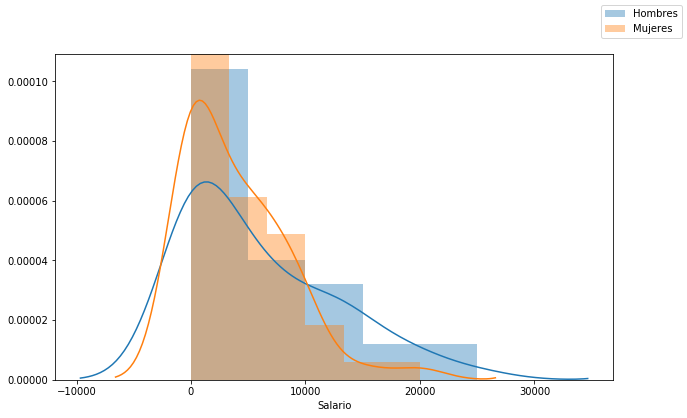

In [22]:
fig = plt.figure(figsize=(10,6))
sns.distplot(Hombres.Salario,label="Hombres")
sns.distplot(Mujeres.Salario,label="Mujeres")
fig.legend()#labels=['Hombres','Mujeres'])
plt.show()

## Distribución de salario por sexo(solo trabaja = si)

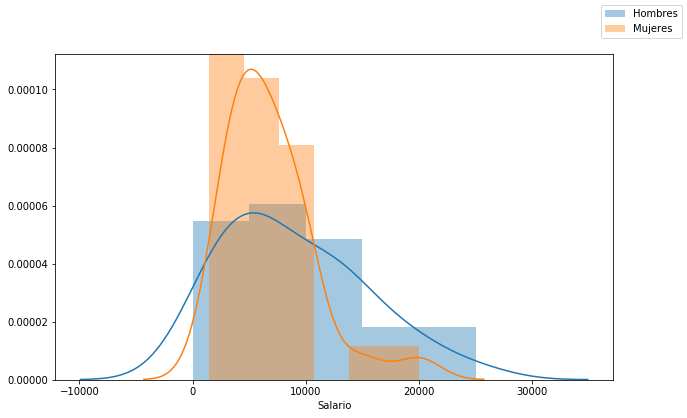

In [23]:
fig = plt.figure(figsize=(10,6))
sns.distplot(Hombres_si_trabaja.Salario,label="Hombres")
sns.distplot(Mujeres_si_trabaja.Salario,label="Mujeres")
fig.legend()#labels=['Hombres','Mujeres'])
plt.show()

## Análisis por sección y titulo de licenciatura

In [24]:
datos_analisis.groupby(['seccion','titulo_licenciatura']).describe().T

seccion                             A                                      \
titulo_licenciatura Cirujano Dentista Diseño Gráfico Ingenieria Eléctrica   
Edad    count                2.000000            1.0                  1.0   
        mean                30.000000           29.0                 30.0   
        std                  4.242641            NaN                  NaN   
        min                 27.000000           29.0                 30.0   
        25%                 28.500000           29.0                 30.0   
        50%                 30.000000           29.0                 30.0   
        75%                 31.500000           29.0                 30.0   
        max                 33.000000           29.0                 30.0   
Salario count                2.000000            1.0                  1.0   
        mean             13500.000000         5000.0              12000.0   
        std               9192.388155            NaN                  NaN   
        min               7000.000000         5000.0              12000.0   
        25%              10250.000000         5000.0              12000.0   
        50%              13500.000000         5000.0              12000.0   
        75%              16750.000000         5000.0              12000.0   
        max              20000.000000         5000.0              12000.0   

seccion                                                           \
titulo_licenciatura Ingenieria Industrial Ingenieria en Sistemas   
Edad    count                         1.0               4.000000   
        mean                         48.0              29.000000   
        std                           NaN               1.154701   
        min                          48.0              28.000000   
        25%                          48.0              28.000000   
        50%                          48.0              29.000000   
        75%                          48.0              30.000000   
        max                          48.0              30.000000   
Salario count                         1.0               4.000000   
        mean                      13000.0           19000.000000   
        std                           NaN            4966.554809   
        min                       13000.0           13000.000000   
        25%                       13000.0           16750.000000   
        50%                       13000.0           19000.000000   
        75%                       13000.0           21250.000000   
        max                       13000.0           25000.000000   

seccion                                                     \
titulo_licenciatura      Medicina No informó Nutricionista   
Edad    count           47.000000        1.0           1.0   
        mean            25.127660       24.0          24.0   
        std              2.261368        NaN           NaN   
        min             22.000000       24.0          24.0   
        25%             24.000000       24.0          24.0   
        50%             24.000000       24.0          24.0   
        75%             26.000000       24.0          24.0   
        max             31.000000       24.0          24.0   
Salario count           47.000000        1.0           1.0   
        mean          3434.468085        0.0        4200.0   
        std           4575.094586        NaN           NaN   
        min              0.000000        0.0        4200.0   
        25%              0.000000        0.0        4200.0   
        50%           1200.000000        0.0        4200.0   
        75%           6150.000000        0.0        4200.0   
        max          20000.000000        0.0        4200.0   

seccion                                                         B  \
titulo_licenciatura Engenieria en Sistemas de Producción Agrícola   
Edad    count                                                 1.0   
        mean                                                 30.

## Conteo de estudiantes por sección y municipio

In [25]:
datos_analisis.groupby(['seccion','Muni Res'])['seccion','Muni Res'].size().unstack().T

seccion,A,B
Muni Res,,
Amatitlan,1.0,1.0
Antigua,1.0,2.0
Chimaltenango,2.0,1.0
Chinautla,1.0,1.0
El Tejar,1.0,NaN
Guatemala,31.0,21.0
Jalapa,1.0,NaN
Magdalena Milpas Altas,NaN,1.0
Mixco,14.0,7.0


## Conteo de estudiantes por municipio de residencia

Guatemala                 52
Mixco                     21
Villa Nueva                4
San Miguel Petapa          3
Antigua                    3
Chimaltenango              3
Chinautla                  2
Amatitlan                  2
Patzicia                   1
Villa Canales              1
El Tejar                   1
San lucas                  1
Magdalena Milpas Altas     1
Jalapa                     1
San Lucas                  1
Santa Catarina Pinula      1
San José Pinula            1
Name: Muni Res, dtype: int64


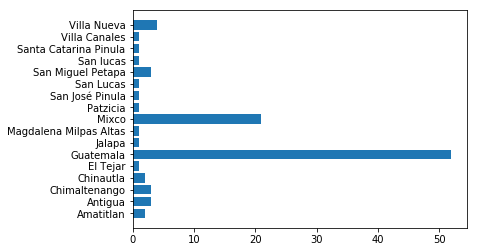

In [26]:
value_counts = datos_analisis['Muni Res'].value_counts()
x = value_counts.keys()
y = [value_counts[key] for key in x]

plt.barh(x,y)
print(value_counts)

plt.show()

## Análisis de medio de información por sexo(conteo)

In [27]:
datos_analisis.groupby(['sexo','medio_informacion'])['sexo','medio_informacion'].size().unstack().T

sexo,Hombre,Mujer
medio_informacion,,
Familiares y amigos,NaN,1.0
Internet,35.0,36.0
Noticieros de televisión,7.0,7.0
Periódicos,5.0,1.0
Radio,1.0,4.0
Redes sociales,2.0,NaN


## Salario promedio por hombre y municipio de residencia

In [28]:
datos_analisis.groupby(['sexo','Muni Res'])['Salario'].mean().unstack().T

sexo,Hombre,Mujer
Muni Res,,
Amatitlan,6300.000000,0.000000
Antigua,0.000000,1250.000000
Chimaltenango,9000.000000,0.000000
Chinautla,2500.000000,8000.000000
El Tejar,NaN,0.000000
Guatemala,5707.692308,3866.153846
Jalapa,0.000000,NaN
Magdalena Milpas Altas,NaN,5500.000000
Mixco,4954.545455,3922.500000


## Pruebas de hipótesis con prueba de chi-cuadrado

In [29]:
def prueba_chi_cuadrado(tabla_contingencia,significancia):
    prob = 1- significancia
    
    chi2_calculado,valor_p,grados_libertad,frecuencias_esperadas  = chi2_contingency(tabla_contingencia)
    valor_critico = chi2.ppf(prob,grados_libertad)
    
    print("frecuencias esperadas:")
    print(frecuencias_esperadas)
    print("grados de libertad:",grados_libertad)
    print("chi cuadrado calculado:",chi2_calculado)
    print("valor p:",valor_p)
    print("-----------------------------------------")
    print("valor crítico:",valor_critico)
    
    print("Es Chi cuadrado calculado ",chi2_calculado ,">= valor crítico " , valor_critico ,"?")

    if chi2_calculado >= valor_critico:
        print("--Si")
        print("No independiente (rechazamos H0)")
    else:
        print("--No")
        print("Independiente (fallamos en rechazar H0)")
    

### Prueba 1: es el trabajo  dependiente del sexo?
* H0(hipótesis nula): el trabajo es independiente del sexo
* H1(hipótesis alternativa): el trabajo no es independiente del sexo
* nivel de significancia = 0.05

In [30]:
significancia = 0.05

tabla_contingencia = datos_analisis.groupby(["sexo","trabaja"]).size().unstack()
tabla_contingencia

trabaja,No,Sí
sexo,,
Hombre,17,33
Mujer,21,28


In [31]:
prueba_chi_cuadrado(tabla_contingencia,significancia)

frecuencias esperadas:
[[19.19191919 30.80808081]
 [18.80808081 30.19191919]]
grados de libertad: 1
chi cuadrado calculado: 0.4890860787800874
valor p: 0.4843352672173442
-----------------------------------------
valor crítico: 3.8414588206941236
Es Chi cuadrado calculado  0.4890860787800874 >= valor crítico  3.8414588206941236 ?
--No
Independiente (fallamos en rechazar H0)


### Prueba 2: es el trabajo  dependiente de la sección?
* H0(hipótesis nula): el trabajo es independiente de la sección
* H1(hipótesis alternativa): el trabajo no es independiente de la sección
* nivel de significancia = 0.05

In [32]:
significancia = 0.05

tabla_contingencia = datos_analisis.groupby(["seccion","trabaja"]).size().unstack()
tabla_contingencia

trabaja,No,Sí
seccion,,
A,25,33
B,13,28


In [33]:
prueba_chi_cuadrado(tabla_contingencia,significancia)

frecuencias esperadas:
[[22.26262626 35.73737374]
 [15.73737374 25.26262626]]
grados de libertad: 1
chi cuadrado calculado: 0.8811652743621242
valor p: 0.3478827187306116
-----------------------------------------
valor crítico: 3.8414588206941236
Es Chi cuadrado calculado  0.8811652743621242 >= valor crítico  3.8414588206941236 ?
--No
Independiente (fallamos en rechazar H0)
